In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [100]:
dem_df = pd.read_csv('../data/post_dem_candidates_with_tweet_topics.csv', encoding="ISO-8859-1").dropna(subset=['primary_pctg'])
rep_df = pd.read_csv('../data/post_rep_candidates_with_tweet_topics.csv', encoding="ISO-8859-1").dropna(subset=['primary_pctg'])
tweets_with_topics = pd.read_csv('../data/tweet_data/tweets_with_topics_post.csv', index_col=False)
sa_all_tweets = pd.read_csv('../data/tweet_data/sa_all_tweets_post.csv', index_col=False)
sa_tweets_raw = pd.read_csv('../data/tweet_data/test_results.tsv', sep='\t', names = ["neg_prob", "neutral_prob", "pos_prob"])
sa_all_tweets['neg_prob'] = sa_tweets_raw.neg_prob
sa_all_tweets['neutral_prob'] = sa_tweets_raw.neutral_prob
sa_all_tweets['pos_prob'] = sa_tweets_raw.pos_prob

all_tweets_cleaned = pd.read_csv('../data/tweet_data/all_tweets_cleaned.csv', index_col=False)
dem_df['sentiment'] = dem_df['sentiment'].fillna(0)
rep_df['sentiment'] = rep_df['sentiment'].fillna(0)





In [176]:
# sa_all_tweets.loc[sa_all_tweets['pos_prob'] >= 0.9, 'sentiment'] = 4
# sa_all_tweets.to_csv('../data/tweet_data/sa_all_tweets_post.csv', index=False)

In [161]:
sa_all_tweets['neutral_prob'].max()

0.0012331718

In [141]:
len(sa_all_tweets[(sa_all_tweets['neg_prob'] >= 0.7) & (sa_all_tweets['neg_prob'] < 0.9)])

91173

In [174]:
for t in sa_all_tweets[(sa_all_tweets['neg_prob'] >= 0.65) & (sa_all_tweets['neg_prob'] < 0.7)].sample(100).stripped_text:
    print(t, '\n')
    

Bc despite being a good fundraiser, he had to spend down to compete in the primary, while Hogan comfortably sat on a $10M warchest & RGA hammered w attack ads. Its money. If hes fundraising hes not with average voters, exactly the position Hogan wants him in. To help, donate. 

4/ Gold Star Wives (even calling them his ladies"), but hasn't even sponsored a bill that would help them to do something as simple as buy groceries or have access to healthcare in a timely fashion. Words can be cheap. When you haven't put action behind those words to prove.." 

Nuestros hombres y mujeres en las fuerzas armadas arriesgan sus vidas todos los das para defender nuestras libertades. Debemos estar con ellos y sus familias mientras estn en el extranjero, y an ms cuando regresen a casa. #NVGov  

Its time for sensible gun policy in America.  

Our Critical Fundraising Deadline Is In 8 Days, And We Have 800,000 People To Reach Over T  #MAGA #TrumpTrain #idpol 

But men were still executed & for that pat

In [74]:
dem_df.columns

Index(['candidate', 'twitter_handle', 'twitter_handle2', 'state', 'district',
       'office_type', 'race_type', 'race_primary_election_date',
       'primary_status', 'primary_runoff_status', 'general_status',
       'partisan_lean', 'primary_pctg', 'won_primary', 'race', 'veteran',
       'lgbtq', 'elected_official', 'self_funder', 'stem', 'obama_alum',
       'dem_party_support', 'emily_endorsed', 'gun_sense_candidate',
       'biden_endorsed', 'warren_endorsed', 'sanders_endorsed',
       'our_revolution_endorsed', 'justice_dems_endorsed', 'pccc_endorsed',
       'indivisible_endorsed', 'wfp_endorsed', 'votevets_endorsed',
       'no_labels_support', 'has_twitter', 'num_endorsements',
       'gun_control_tweet_count', 'health_care_tweet_count',
       'abortion_tweet_count', 'immigration_tweet_count',
       'kavanaugh_tweet_count', 'education_tweet_count', 'jobs_tweet_count',
       'tax_tweet_count', 'fake_news_tweet_count', 'environment_tweet_count',
       'sexual_assault_tweet

In [73]:
election_context = pd.read_csv('../data/election-context-2018.csv')
print(election_context.columns)
election_context.head(5)

Index(['state', 'county', 'fips', 'trump16', 'clinton16', 'otherpres16',
       'romney12', 'obama12', 'otherpres12', 'demsen16', 'repsen16',
       'othersen16', 'demhouse16', 'rephouse16', 'otherhouse16', 'demgov16',
       'repgov16', 'othergov16', 'repgov14', 'demgov14', 'othergov14',
       'total_population', 'cvap', 'white_pct', 'black_pct', 'hispanic_pct',
       'nonwhite_pct', 'foreignborn_pct', 'female_pct', 'age29andunder_pct',
       'age65andolder_pct', 'median_hh_inc', 'clf_unemploy_pct', 'lesshs_pct',
       'lesscollege_pct', 'lesshs_whites_pct', 'lesscollege_whites_pct',
       'rural_pct', 'ruralurban_cc'],
      dtype='object')


,state,county,fips,trump16,clinton16,otherpres16,romney12,obama12,otherpres12,demsen16,...,age29andunder_pct,age65andolder_pct,median_hh_inc,clf_unemploy_pct,lesshs_pct,lesscollege_pct,lesshs_whites_pct,lesscollege_whites_pct,rural_pct,ruralurban_cc
0,Alabama,Autauga,1001,18172,5936,865,17379,6363,190,6331.0,...,40.037058,13.978456,53099.0,5.591657,12.417046,75.407229,10.002112,74.065601,42.002162,2.0
1,Alabama,Baldwin,1003,72883,18458,3874,66016,18424,898,19145.0,...,35.474412,18.714851,51365.0,6.286843,9.972418,70.452889,7.842227,68.405607,42.279099,3.0
2,Alabama,Barbour,1005,5454,4871,144,5550,5912,47,4777.0,...,37.664387,16.528895,33956.0,12.824738,26.235928,87.132213,19.579752,81.364746,67.789635,6.0
3,Alabama,Bibb,1007,6738,1874,207,6132,2202,86,2082.0,...,37.329435,14.885699,39776.0,7.146827,19.301587,88.000000,15.020490,87.471774,68.352607,1.0
4,Alabama,Blount,1009,22859,2156,573,20757,2970,279,2980.0,...,37.240053,17.192916,46212.0,5.953833,19.968585,86.950243,16.643368,86.163610,89.951502,1.0


In [52]:
# tweet ids of candidates who won
candidate_winners = dem_df[dem_df['won_primary'] == 'Yes'].twitter_handle.append(rep_df[rep_df['won_primary'] == 'Yes'].twitter_handle)
candidate_winners.append(dem_df[dem_df['won_primary'] == 'Yes'].twitter_handle2)
candidate_winners.append(rep_df[rep_df['won_primary'] == 'Yes'].twitter_handle2)

tweet_id_winners = tweets_with_topics[tweets_with_topics['twitter_handle'].isin(set(candidate_winners))].tweet_id.unique()
# tweet_id_winners


array([  1094,   1095,   1096, ..., 557315, 557316, 557317])

In [3]:
sa_all_tweets.head(3)

,tweet_id,stripped_text,twitter_handle,sentiment
0,0,With corruption being one of the biggest conce...,CA_Countryman,0
1,1,With corruption being one of the biggest conce...,CA_Countryman,0
2,2,Here is an important notice concerning Christo...,CA_Countryman,2


In [163]:
tweets_with_topics = tweets_with_topics.rename(index=str, columns={"tweet_idx": "tweet_id"})
tweets_topic_sa = tweets_with_topics.merge(sa_all_tweets[['tweet_id', 'sentiment', 'neg_prob', 'neutral_prob', 'pos_prob']], on=['tweet_id'], how='left')


In [149]:
print(len(tweets_topic_sa[tweets_topic_sa['sentiment'].isna()]))
print(len(tweets_topic_sa))
print(len(tweets_with_topics))
print(len(sa_all_tweets))

0
557549
557549
609527


In [104]:
print(len(all_tweets_cleaned))
print(len(tweets_with_topics))

557549
557549


In [10]:
dem_df.columns

Index(['candidate', 'twitter_handle', 'twitter_handle2', 'state', 'district',
       'office_type', 'race_type', 'race_primary_election_date',
       'primary_status', 'primary_runoff_status', 'general_status',
       'partisan_lean', 'primary_pctg', 'won_primary', 'race', 'veteran',
       'lgbtq', 'elected_official', 'self_funder', 'stem', 'obama_alum',
       'dem_party_support', 'emily_endorsed', 'gun_sense_candidate',
       'biden_endorsed', 'warren_endorsed', 'sanders_endorsed',
       'our_revolution_endorsed', 'justice_dems_endorsed', 'pccc_endorsed',
       'indivisible_endorsed', 'wfp_endorsed', 'votevets_endorsed',
       'no_labels_support', 'has_twitter', 'num_endorsements',
       'gun_control_tweet_count', 'health_care_tweet_count',
       'abortion_tweet_count', 'immigration_tweet_count',
       'kavanaugh_tweet_count', 'education_tweet_count', 'jobs_tweet_count',
       'tax_tweet_count', 'fake_news_tweet_count', 'environment_tweet_count',
       'sexual_assault_tweet

In [11]:
# # Add 'party' column to tweets with topics

# tweets_with_topics = tweets_with_topics.merge(all_tweets_cleaned[['tweet_idx', 'twitter_handle']], how='left', on=['tweet_idx'])
                                                                                         
# dem_candidates = dem_df.twitter_handle.unique()
# dem_candidates2 = dem_df.twitter_handle2.unique()

# party = []
# for i, r in tweets_with_topics.iterrows():
#     if i % 20000 == 0:
#         print('{} / {}'.format(i, len(tweets_with_topics)))
#     if r['twitter_handle'] in dem_candidates or r['twitter_handle'] in dem_candidates2:
#         party.append(0)
#     else:
#         party.append(1)
# tweets_with_topics['party'] = party

# tweets_with_topics.to_csv('../data/tweet_data/tweets_with_topics_post.csv', index=False)


In [12]:
topics = ['gun_control', 'health_care',
       'abortion', 'immigration', 'education', 'jobs'
          , 'environment','women', 'lgbt', 'freedom', 'trump']
topic_cols = ['{}_tweet_count'.format(t) for t in topics]

In [13]:
print("dem candidates w/ no classified topics: ", len(dem_df[(dem_df['gun_control_tweet_count'] == 0) & 
          (dem_df['health_care_tweet_count'] == 0) &
          (dem_df['abortion_tweet_count'] == 0) &
          (dem_df['immigration_tweet_count'] == 0) &
          (dem_df['education_tweet_count'] == 0) &
          (dem_df['jobs_tweet_count'] == 0) &
          (dem_df['environment_tweet_count'] == 0) &
          (dem_df['women_tweet_count'] == 0) &
          (dem_df['lgbt_tweet_count'] == 0) &
          (dem_df['freedom_tweet_count'] == 0) & (dem_df['trump_tweet_count'] == 0)]) / len(dem_df))

print("rep candidates w/ no classified topics: ", len(rep_df[(rep_df['gun_control_tweet_count'] == 0) & 
          (rep_df['health_care_tweet_count'] == 0) &
          (rep_df['abortion_tweet_count'] == 0) &
          (rep_df['immigration_tweet_count'] == 0) &
          (rep_df['education_tweet_count'] == 0) &
          (rep_df['jobs_tweet_count'] == 0) &
          (rep_df['environment_tweet_count'] == 0) &
          (rep_df['women_tweet_count'] == 0) &
          (rep_df['lgbt_tweet_count'] == 0) &
          (rep_df['freedom_tweet_count'] == 0) & (rep_df['trump_tweet_count'] == 0)]) / len(rep_df))

dem candidates w/ no classified topics:  0.22685788787483702
rep candidates w/ no classified topics:  0.4287769784172662


In [14]:
def get_topic_df(candidate_df, party):
    max_count_col = []
    median_count_col = []
    avg_count_col = []
    total_classified_col = []
    
    for t in topics:
        topic_count = len(tweets_with_topics[(tweets_with_topics[t] == 1) & (tweets_with_topics['party'] == party)])
        max_count = candidate_df["{}_tweet_count".format(t)].max()
        avg_count = candidate_df["{}_tweet_count".format(t)].mean()
        max_count_col.append(max_count)
        avg_count_col.append(round(avg_count, 2))
        total_classified_col.append(topic_count)
    df = pd.DataFrame(np.transpose([topics,avg_count_col, max_count_col, total_classified_col])
             , columns=['topic', 'avg_count', 'max_count', 'total_classified'])
    df['max_count'] = df['max_count'].astype('int32')
    df['total_classified'] = df['total_classified'].astype('int32')
    return df
    
dem_topic_df = get_topic_df(dem_df, 0)
rep_topic_df = get_topic_df(rep_df, 1)

In [15]:
print("total tweets: ",len(tweets_with_topics[tweets_with_topics['party'] == 0]))
dem_topic_df.sort_values(by=['total_classified'], ascending=False).reset_index(drop=True)

total tweets:  381881


,topic,avg_count,max_count,total_classified
0,trump,28.24,554,21582
1,health_care,23.49,343,17831
2,gun_control,15.01,352,11455
3,jobs,13.25,157,10071
4,education,9.55,192,7292
5,environment,7.65,1026,5855
6,immigration,7.04,192,5379
7,lgbt,2.39,64,1826
8,freedom,2.16,55,1651
9,women,2.03,59,1548


In [16]:
print("total tweets: ", len(tweets_with_topics[tweets_with_topics['party'] == 1]))
rep_topic_df.sort_values(by=['total_classified'], ascending=False).reset_index(drop=True)

total tweets:  175668


,topic,avg_count,max_count,total_classified
0,trump,19.53,1015,13818
1,immigration,6.15,324,4339
2,jobs,5.74,200,4124
3,gun_control,4.23,254,3086
4,health_care,3.77,473,2956
5,freedom,3.48,276,2418
6,education,2.47,83,1738
7,abortion,1.96,75,1405
8,environment,0.56,33,435
9,women,0.21,10,157


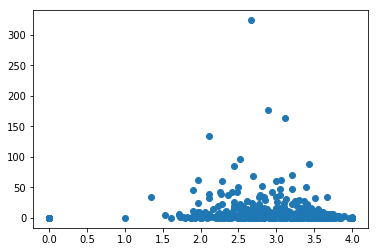

In [150]:
fig, axs = plt.subplots(1)
axs.scatter(rep_df['sentiment'], rep_df['immigration_tweet_count'])

In [151]:
tweets_with_topics.columns

Index(['tweet_id', 'stripped_text', 'party', 'gun_control', 'health_care',
       'abortion', 'immigration', 'kavanaugh', 'education', 'jobs', 'tax',
       'fake_news', 'environment', 'sexual_assault', 'gender', 'women', 'lgbt',
       'freedom', 'trump', 'twitter_handle'],
      dtype='object')

(array([ 844.,    0., 1478.,    0., 2017.]),
 array([0, 1, 2, 3, 4, 5]),
 <a list of 5 Patch objects>)

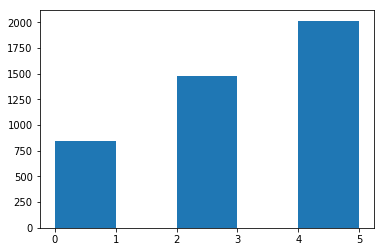

In [164]:
fig, axs = plt.subplots(1)
rep = tweets_topic_sa[(tweets_topic_sa['immigration'] == 1) & tweets_topic_sa['party'] == 1].sentiment
axs.hist(rep, bins=[0, 1, 2, 3, 4, 5])

In [153]:
tweets_topic_sa.head(3)

,tweet_id,stripped_text,party,gun_control,health_care,abortion,immigration,kavanaugh,education,jobs,...,gender,women,lgbt,freedom,trump,twitter_handle,sentiment,neg_prob,neutral_prob,pos_prob
0,0,with corruption being one of the biggest conce...,0,False,0,0,0,0,0,0,...,False,False,0,0,0,CA_Countryman,0,0.719503,6.849774e-08,0.280497
1,1,with corruption being one of the biggest conce...,0,False,0,0,0,0,0,0,...,False,False,0,0,0,CA_Countryman,0,0.761665,4.084816e-08,0.238335
2,2,here is an important notice concerning christo...,0,False,0,0,0,0,0,0,...,False,False,0,0,0,CA_Countryman,2,0.684472,4.112755e-07,0.315528


### Sentiment Ratios

In [165]:
print(len(tweet_id_winners))
print(len(rep_winners))
print(len(tweets_topic_sa[tweets_topic_sa['tweet_id'].isin(set(tweet_id_winners))]))
print(tweet_id_winners)

205363
60657
205363
[  1094   1095   1096 ... 557315 557316 557317]


num rep tweets:  175668
60657
num dem tweets:  381881


(-1.127686682723835,
 1.1075149597370406,
 -1.1296921940855285,
 1.1014139140040728)

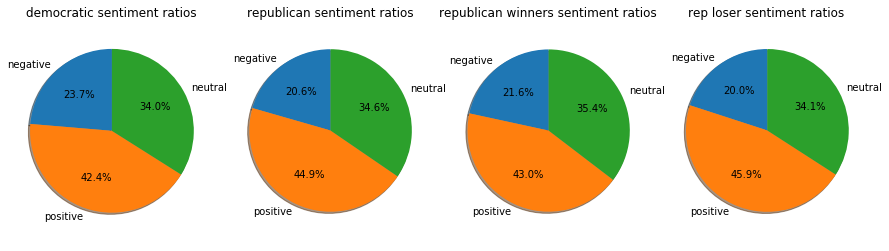

In [166]:
# All Candidates
rep = tweets_topic_sa[tweets_topic_sa['party'] == 1]
dem = tweets_topic_sa[tweets_topic_sa['party'] == 0]
rep_winners = tweets_topic_sa[(tweets_topic_sa['party'] == 1) & (tweets_topic_sa['tweet_id'].isin(tweet_id_winners))]
dem_winners = tweets_topic_sa[(tweets_topic_sa['party'] == 0) & (tweets_topic_sa['tweet_id'].isin(tweet_id_winners))]
rep_losers = tweets_topic_sa[(tweets_topic_sa['party'] == 1) & (~tweets_topic_sa['tweet_id'].isin(tweet_id_winners))]

print("num rep tweets: ", len(rep))
print(len(rep_winners))
print("num dem tweets: ", len(dem))

dem_nums = [len(dem[dem['sentiment'] == 0]), len(dem[dem['sentiment'] == 4]), len(dem[dem['sentiment'] == 2])]
rep_nums = [len(rep[rep['sentiment'] == 0]), len(rep[rep['sentiment'] == 4]), len(rep[rep['sentiment'] == 2])]
rep_winners_nums = [len(rep_winners[rep_winners['sentiment'] == 0]), len(rep_winners[rep_winners['sentiment'] == 4]), len(rep_winners[rep_winners['sentiment'] == 2])]
rep_losers_nums = [len(rep_losers[rep_losers['sentiment'] == 0]), len(rep_losers[rep_losers['sentiment'] == 4]), len(rep_losers[rep_losers['sentiment'] == 2])]


labels = ['negative', 'positive', 'neutral']
f, axs = plt.subplots(1,4,figsize=(15,4))
axs[0].pie(dem_nums, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[0].set_title("democratic sentiment ratios")
axs[0].axis('equal')
axs[1].pie(rep_nums, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[1].set_title("republican sentiment ratios")
axs[1].axis('equal')

axs[2].pie(rep_winners_nums, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[2].set_title("republican winners sentiment ratios")
axs[2].axis('equal')

axs[3].pie(rep_losers_nums, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[3].set_title("rep loser sentiment ratios")
axs[3].axis('equal')



In [167]:
def print_sentiment_breakdown(tweets_topic_sa, topic):
    print("== democratic ratios == ")
    rep = tweets_topic_sa[(tweets_topic_sa[topic] == 1) & tweets_topic_sa['party'] == 1]
    dem = tweets_topic_sa[(tweets_topic_sa[topic] == 1) & tweets_topic_sa['party'] == 0]
    print("negative sentiment: ", len(dem[dem['sentiment'] == 0]) / len(dem))
    print("positive sentiment: ", len(dem[dem['sentiment'] == 4]) / len(dem))
    print("neutral sentiment: ", len(dem[dem['sentiment'] == 2]) / len(dem))

    print("\n== republican ratios == ")
    print("negative sentiment: ", len(rep[rep['sentiment'] == 0]) / len(rep))
    print("positive sentiment: ", len(rep[rep['sentiment'] == 4]) / len(rep))
    print("neutral sentiment: ", len(rep[rep['sentiment'] == 2]) / len(rep))

def plot_topic(topic):
    print(topic)
    f, axs = plt.subplots(1,2,figsize=(15,4))
    rep = tweets_topic_sa[(tweets_topic_sa[topic] == 1) & tweets_topic_sa['party'] == 1]
    dem = tweets_topic_sa[(tweets_topic_sa[topic] == 1) & tweets_topic_sa['party'] == 0]

    axs[0].hist(dem.sentiment, color='blue', bins=[0, 1, 2, 3, 4, 5])
    axs[0].set_title("democratic - {}".format(topic))
    axs[1].hist(rep.sentiment, color='red', bins=[0, 1, 2, 3, 4, 5])
    axs[1].set_title("republican - {}".format(topic))
    print_sentiment_breakdown(tweets_topic_sa, topic)
    return dem, rep

In [168]:
print(len(tweets_topic_sa[(tweets_topic_sa['health_care'] == 1) & (tweets_topic_sa['party'] == 0) & (tweets_topic_sa['sentiment'] == 0)]))

print(len(tweets_topic_sa[(tweets_topic_sa['health_care'] == 1) & (tweets_topic_sa['party'] == 0)]))
print(4158 /17831)

4158
17831
0.23318938926588526


In [171]:
for t in tweets_topic_sa[(tweets_topic_sa['trump'] == 1) & (tweets_topic_sa['party'] == 0)].sample(10).stripped_text:
    print(t, '\n')

if you need healthcare, open enrollment is going on now. it's been a record year already - let's keep up the pressure to show dc that we're a 'yes' on #aca and #obamacare and a resounding 'no' to #trumpcare!  

one year ago the trump administration initiated the united states withdraw from the #parisagreement. im proud to stand with the @caucusonclimate to tell the world that we are #stillin the fight against climate change. 

reggie on what @realdonaldtrump has done right: take a look around this room. hes energized the democratic party! 

he also had enough time to nominate president trump for a nobel peace prize but not enough time to attend a town hall for harvey victims. #tx22debate 

in what was easily his most significant action to drain the swamp so far, president trump accepted the resignation of his epa chief, scott pruitt. but thats little comfort to those who breathe air, for trump chose dc insider/fossil-fuels lobbyist andrew wheeler to take over. 

cdc gets list of forbid

In [175]:
for t in tweets_topic_sa[(tweets_topic_sa['trump'] == 1) & (tweets_topic_sa['party'] == 0) & (tweets_topic_sa['sentiment'] == 4)].sample(10).stripped_text:
    print(t, '\n')

we can stop this. we can. but we can't stop demanding change. we cannot relent in our demands for safe schools, safe parks, safe whatever. and we can't forget this when trump predictably does something idiotic, whether that is in an hour or two or tomorrow. 

we were promised an infrastructure package to rebuild our roads and bridges but @realdonaldtrump has built exactly nothing. so @bettysutton & i will improve ohios infrastructure so workers can get to work and we can all get where we need to go.  

probably him and stephen miller. i bet trump just saw the trailer. 

. @realdonaldtrump keeps referencing a crisis at the border. a reminder that immigration is at historic lows, border communities are among the safest in us, and us takes in fewer refugees and asylum seekers than other countries. what we have is a #moralcrisis fueled by racism 

the votes after president trump took office, however, were very real threats to take health care away from 10s of millions of americans, includi

trump
== democratic ratios == 
negative sentiment:  0.22736426652149686
positive sentiment:  0.43096126577296495
neutral sentiment:  0.3416744677055382

== republican ratios == 
negative sentiment:  0.2063974525980605
positive sentiment:  0.45918367346938777
neutral sentiment:  0.33441887393255176
this move would allow a federal prosecutor in colorado, appointed by the trump administration, to essentially recreate a black market if they want to, and put resources into fighting something that: - doesn't kill - is prescribed as medicine - is a major revenue source 

fy19 #ndaa is coming up & my advise to him was to not give trump anymore money for war. earmark that money for veterans & their families. war destabilizes nations & causes more #violence, more #poverty, #climatecrisis, #massmigration & more ecological devastation. 

more people are realizing @realdonaldtrump is a conman who doesn't care about working americans:  bad news for himand for @repmimiwalters who votes with him 98.3%

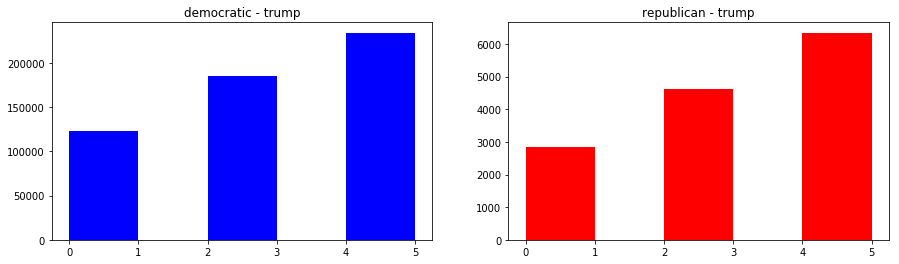

In [170]:
topic = 'trump'

dem, rep = plot_topic('trump')
# print_sentiment_breakdown(dem, rep)
# topic = tweets_topic_sa[(tweets_topic_sa[topic] == 1) & tweets_topic_sa['party'] == 0]


In [ ]:
dem_trump = tweets_topic_sa[(tweets_topic_sa['trump'] == 1) & tweets_topic_sa['party'] == 0]
rep_trump = tweets_topic_sa[(tweets_topic_sa['trump'] == 1) & tweets_topic_sa['party'] == 1]


health_care
== democratic ratios == 
negative sentiment:  0.22691595458291036
positive sentiment:  0.5813091762788207
neutral sentiment:  0.19177486913826897

== republican ratios == 
negative sentiment:  0.21346414073071718
positive sentiment:  0.5967523680649527
neutral sentiment:  0.18978349120433016
the nys assembly continues to show up for progressive values & what 75% of dems & 58% of independents agree on: single-payer #medicareforall. sadly, we cant count on the state senate to follow suit. when i get to congress, ill pass #mfa so states dont have to carry the burden.  

oh hey look, the average georgia family will see a nearly $2,000 increase in insurance premiums. in addition to automatic cuts to medicare, medicaid, and social security.  

undefined   at the 15 minute mark, archie parnell says he is not in favor of single payer healthcare. listen for yourself. 

here is my answer on healthcare. universal affordable and accessible healthcare for everyone. we can accomplish thi

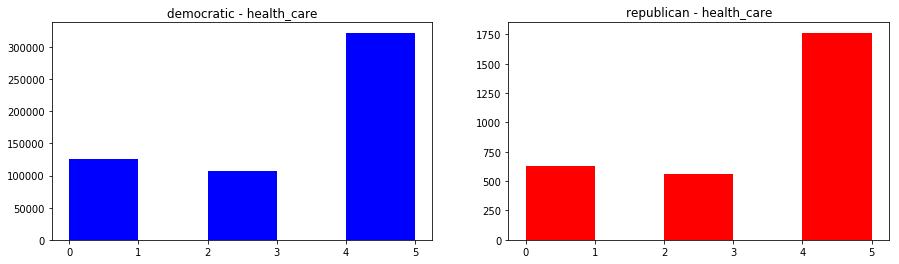

In [126]:
topic = 'health_care'

df, df1 = plot_topic('health_care')
for t in tweets_topic_sa[(tweets_topic_sa['health_care'] == 1) & (tweets_topic_sa['party'] == 0)].sample(10).stripped_text:
    print(t, '\n')
# print_sentiment_breakdown(df, df1)

immigration
== democratic ratios == 
negative sentiment:  0.22709820863686483
positive sentiment:  0.4314003723721552
neutral sentiment:  0.3415014189909799

== republican ratios == 
negative sentiment:  0.1945148651763079
positive sentiment:  0.4648536529154183
neutral sentiment:  0.3406314819082738


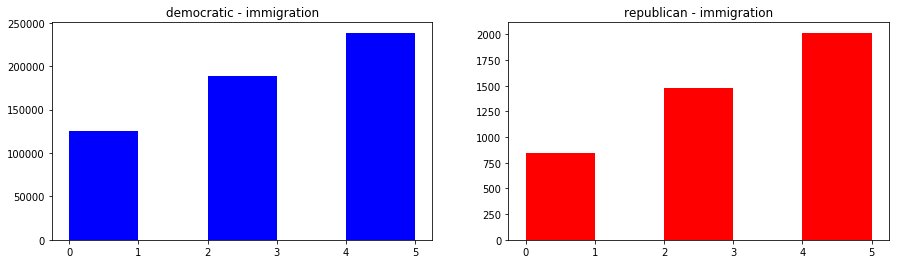

In [172]:
topic = 'immigration'
dem, rep = plot_topic(topic)

lgbt
== democratic ratios == 
negative sentiment:  0.22684784071034575
positive sentiment:  0.5813910937710212
neutral sentiment:  0.19176106551863312

== republican ratios == 
negative sentiment:  0.20270270270270271
positive sentiment:  0.581081081081081
neutral sentiment:  0.21621621621621623


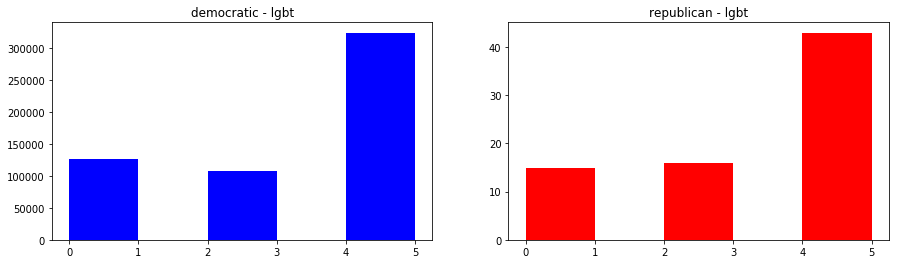

In [92]:
topic = 'lgbt'
dem, rep = plot_topic(topic)

education
== democratic ratios == 
negative sentiment:  0.2268540924882739
positive sentiment:  0.5814044702245907
neutral sentiment:  0.19174143728713539

== republican ratios == 
negative sentiment:  0.2238204833141542
positive sentiment:  0.5771001150747986
neutral sentiment:  0.19907940161104717


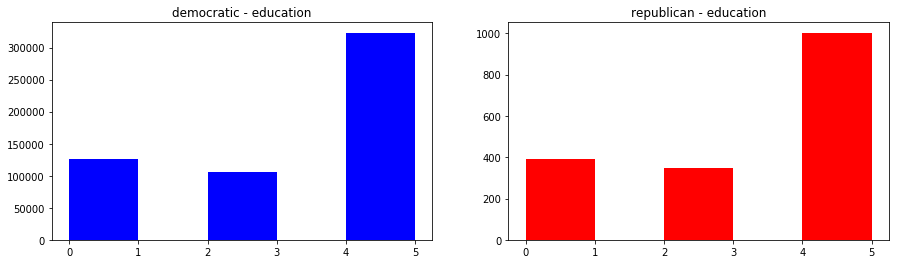

In [93]:
topic = 'education'
dem, rep = plot_topic(topic)